<a href="https://colab.research.google.com/github/Shakia123/Speak4Them/blob/main/Child_abuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import scipy
import plotly.express as px

#Dataset

In [ ]:
ds = pd.read_csv("/content/sample_data/bangladesh_child_abuse.csv")
print(ds.shape)

(15000, 25)


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   report_id                15000 non-null  int64  
 1   district                 15000 non-null  object 
 2   date_of_report           15000 non-null  object 
 3   victim_age               14495 non-null  float64
 4   victim_gender            15000 non-null  object 
 5   reporter_type            15000 non-null  object 
 6   description              15000 non-null  object 
 7   abuse_types              15000 non-null  object 
 8   risk_level               15000 non-null  object 
 9   follow_up_required       15000 non-null  object 
 10  case_status              15000 non-null  object 
 11  urban_rural              15000 non-null  object 
 12  Physical violence        15000 non-null  int64  
 13  Sexual abuse             15000 non-null  int64  
 14  Emotional abuse       

In [ ]:
missing_values = ds.isnull().sum()
print(missing_values)

report_id                    0
district                     0
date_of_report               0
victim_age                 505
victim_gender                0
reporter_type                0
description                  0
abuse_types                  0
risk_level                   0
follow_up_required           0
case_status                  0
urban_rural                  0
Physical violence            0
Sexual abuse                 0
Emotional abuse              0
Neglect (basic needs)        0
Child labor                  0
Early marriage               0
Exploitation                 0
Educational deprivation      0
Abandonment                  0
Cyber exploitation           0
follow_up_Yes                0
follow_up_No                 0
follow_up_pending            0
dtype: int64


In [ ]:
ds = ds.dropna(subset=['victim_age'])

In [ ]:
print(ds.shape)

(14495, 25)


In [ ]:
#full information on dataset
ds.head()

,report_id,district,date_of_report,victim_age,victim_gender,reporter_type,description,abuse_types,risk_level,follow_up_required,...,Neglect (basic needs),Child labor,Early marriage,Exploitation,Educational deprivation,Abandonment,Cyber exploitation,follow_up_Yes,follow_up_No,follow_up_pending
0,25914370,Kishoreganj,12/4/2024,11.0,Male,Healthcare worker,"Child arranged marriage at age 13, left at hom...","Early marriage, Abandonment",severe,Yes,...,0,0,1,0,0,1,0,1,0,0
1,49551801,Tangail,1/15/2024,6.0,Female,Relative,Child observed unexplained injuries. Corrobora...,Physical violence,medium,No,...,0,0,0,0,0,0,0,0,1,0
2,7995817,Sirajganj,5/30/2023,15.0,Female,Social worker,Child shows signs of withdrawal. Multiple simi...,Emotional abuse,mild,Yes,...,0,0,0,0,0,0,0,1,0,0
3,46305185,Narsingdi,8/2/2020,7.0,Male,Teacher,"Child subjected to sexual exploitation, not at...","Exploitation, Educational deprivation",medium,Yes,...,0,0,0,1,1,0,0,1,0,0
4,3466164,Jamalpur,7/2/2022,14.0,Female,Healthcare worker,Child left with neighbors for weeks. Corrobora...,Abandonment,medium,Pending,...,0,0,0,0,0,1,0,0,0,1


#Shape Visualization

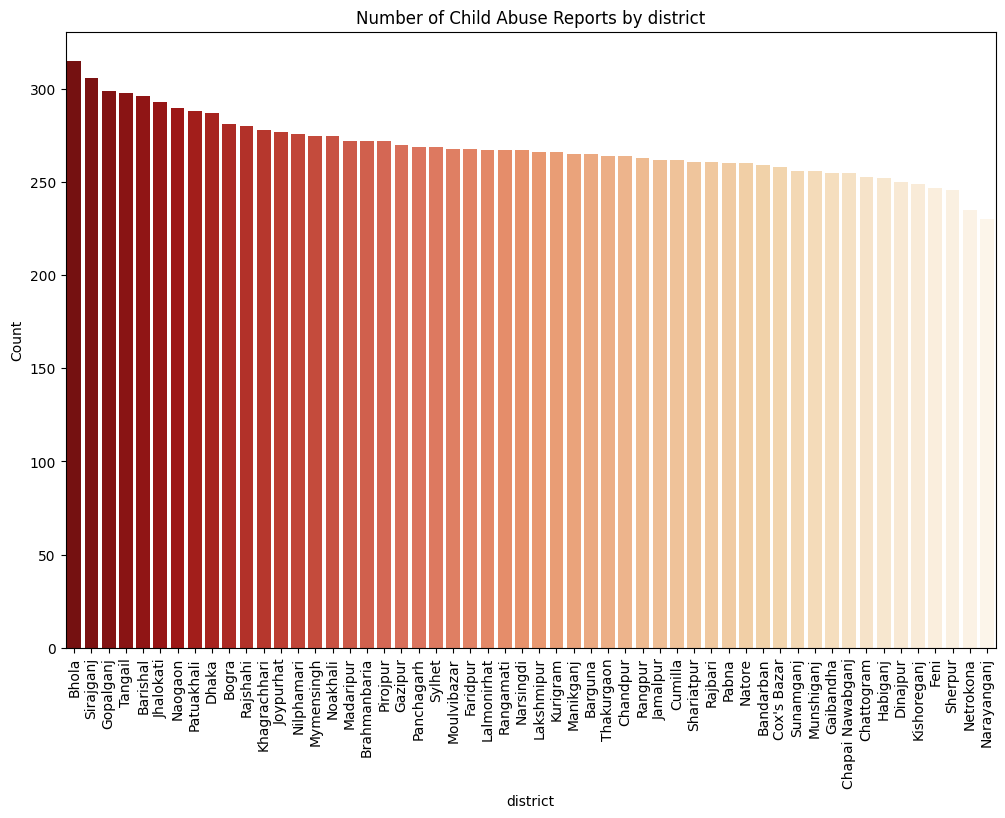

In [ ]:
plt.figure(figsize=(12,8))
district_counts = ds['district'].value_counts().reset_index()
district_counts.columns = ['district', 'Count']
warm_palette = sns.color_palette("OrRd", n_colors=district_counts.shape[0])[::-1]
sns.barplot(data=district_counts, x='district', y='Count', hue='district', palette=warm_palette, dodge=False, legend=False)
plt.xticks(rotation=90)
plt.title("Number of Child Abuse Reports by district")
plt.show()

array([[<Axes: title={'center': 'report_id'}>,
        <Axes: title={'center': 'victim_age'}>,
        <Axes: title={'center': 'Physical violence'}>,
        <Axes: title={'center': 'Sexual abuse'}>],
       [<Axes: title={'center': 'Emotional abuse'}>,
        <Axes: title={'center': 'Neglect (basic needs)'}>,
        <Axes: title={'center': 'Child labor'}>,
        <Axes: title={'center': 'Early marriage'}>],
       [<Axes: title={'center': 'Exploitation'}>,
        <Axes: title={'center': 'Educational deprivation'}>,
        <Axes: title={'center': 'Abandonment'}>,
        <Axes: title={'center': 'Cyber exploitation'}>],
       [<Axes: title={'center': 'follow_up_Yes'}>,
        <Axes: title={'center': 'follow_up_No'}>,
        <Axes: title={'center': 'follow_up_pending'}>, <Axes: >]],
      dtype=object)

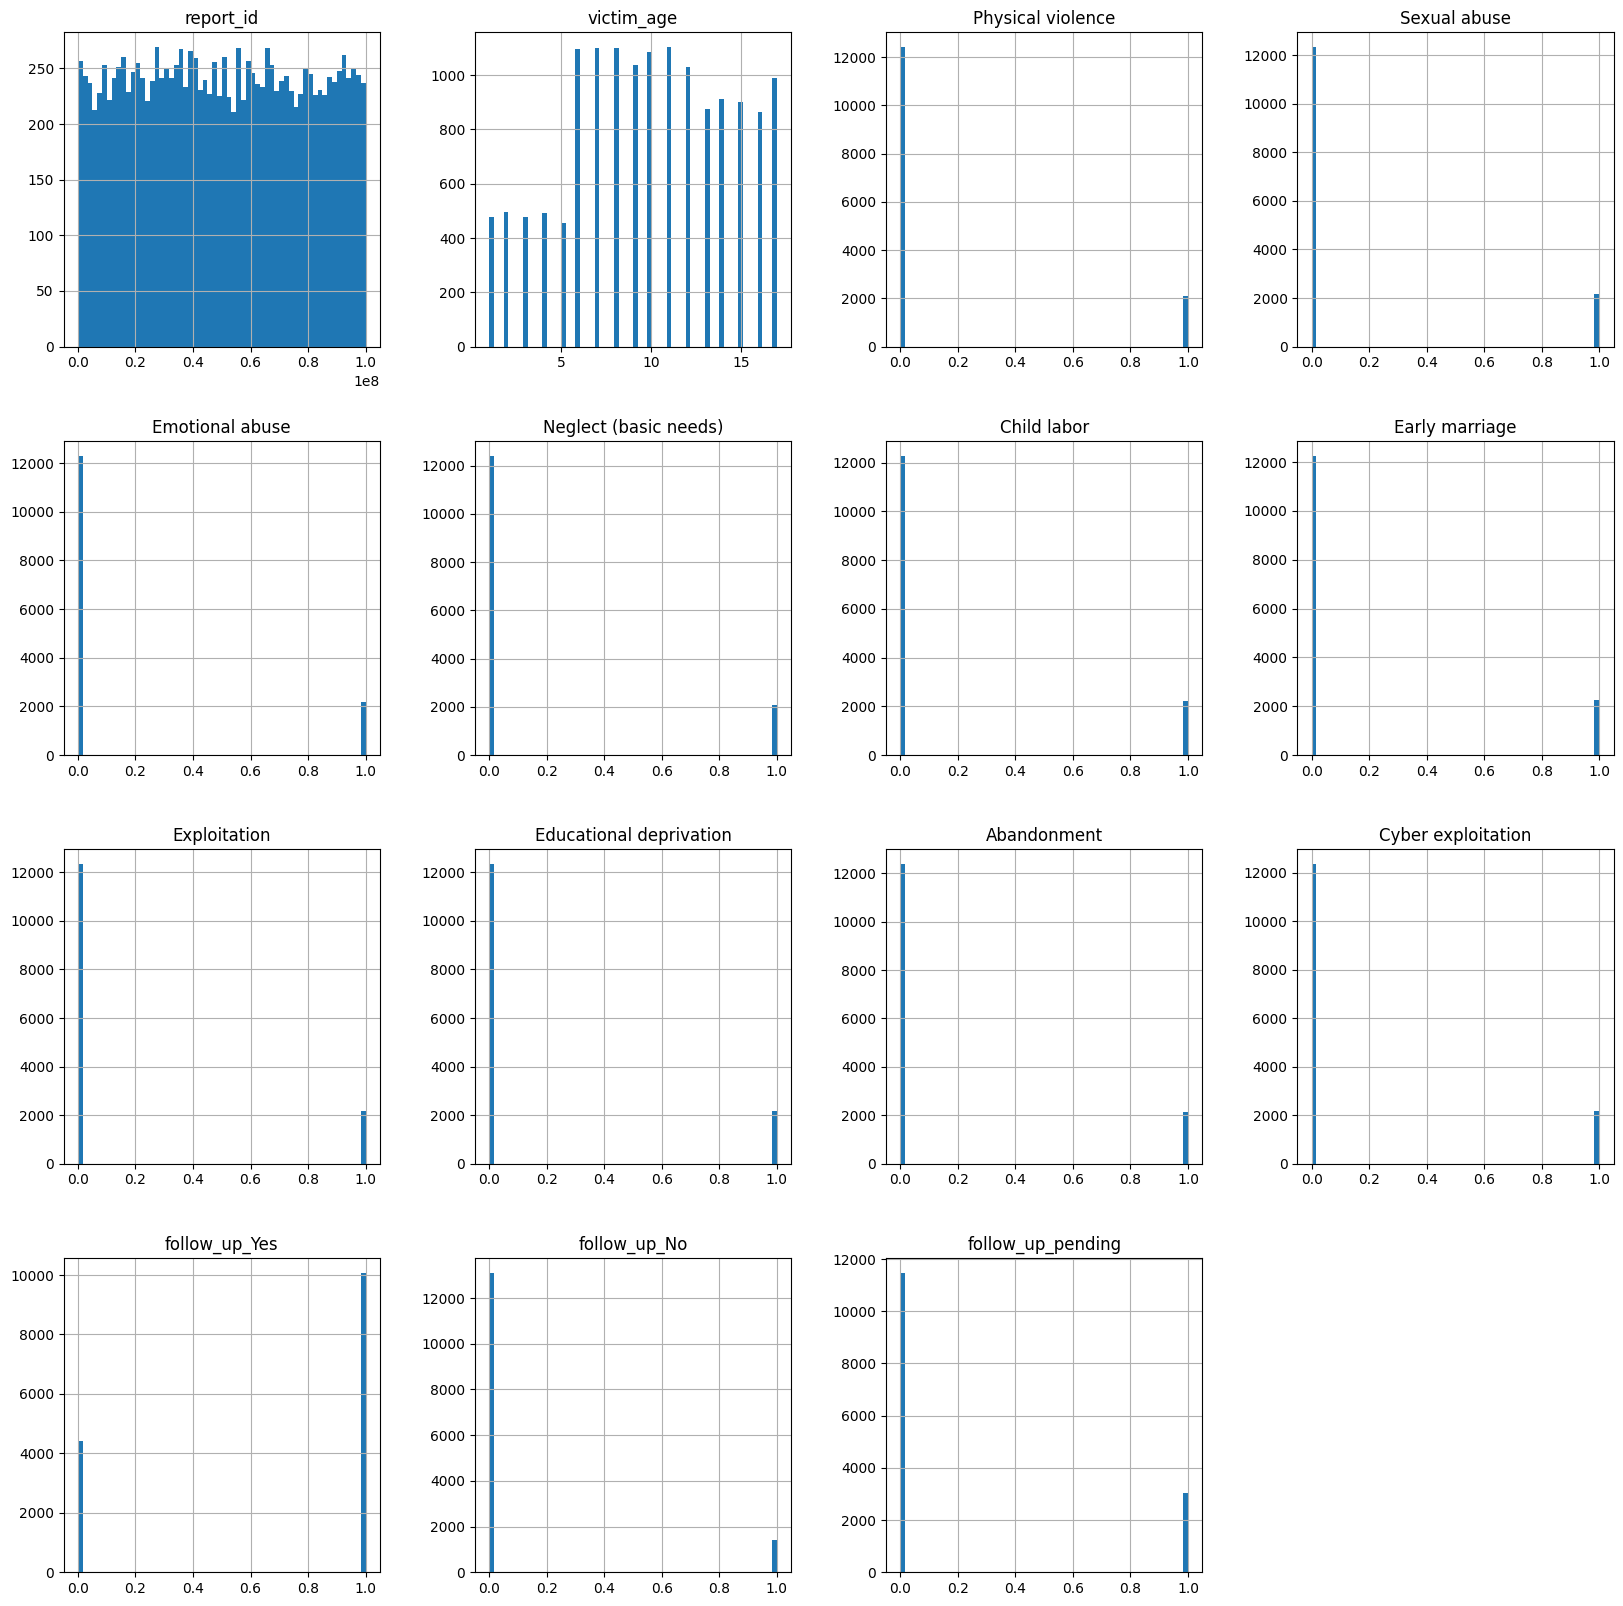

In [ ]:
ds.hist(bins=60, figsize=(20,20))

#Heatmap

In [ ]:
# Replace with actual column name
ds['Report_date'] = pd.to_datetime(ds['date_of_report'])

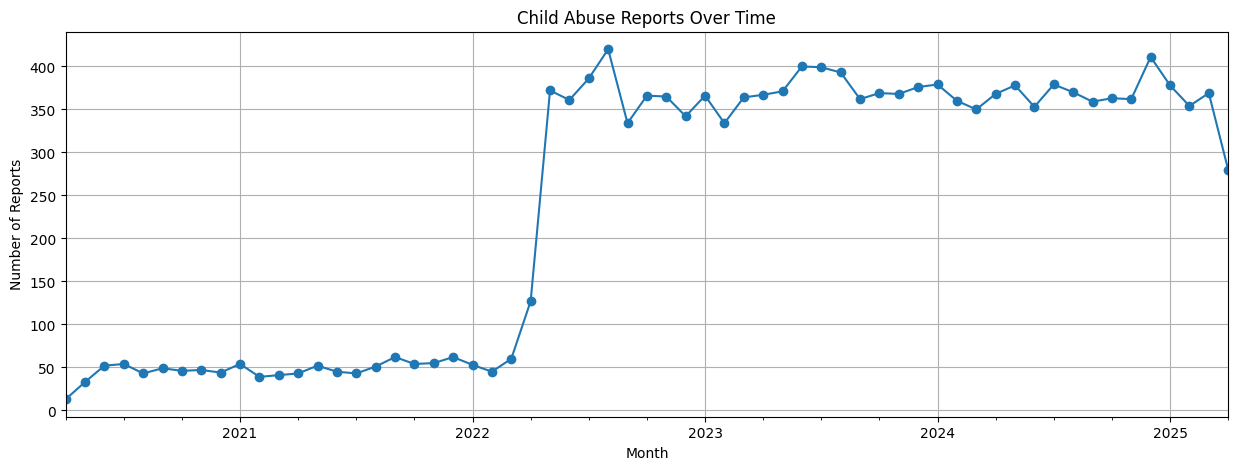

In [ ]:
ds['Month'] = ds['Report_date'].dt.to_period('M')
monthly = ds.groupby('Month').size()

monthly.plot(kind='line', marker='o', figsize=(15,5))
plt.title("Child Abuse Reports Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reports")
plt.grid(True)
plt.show()

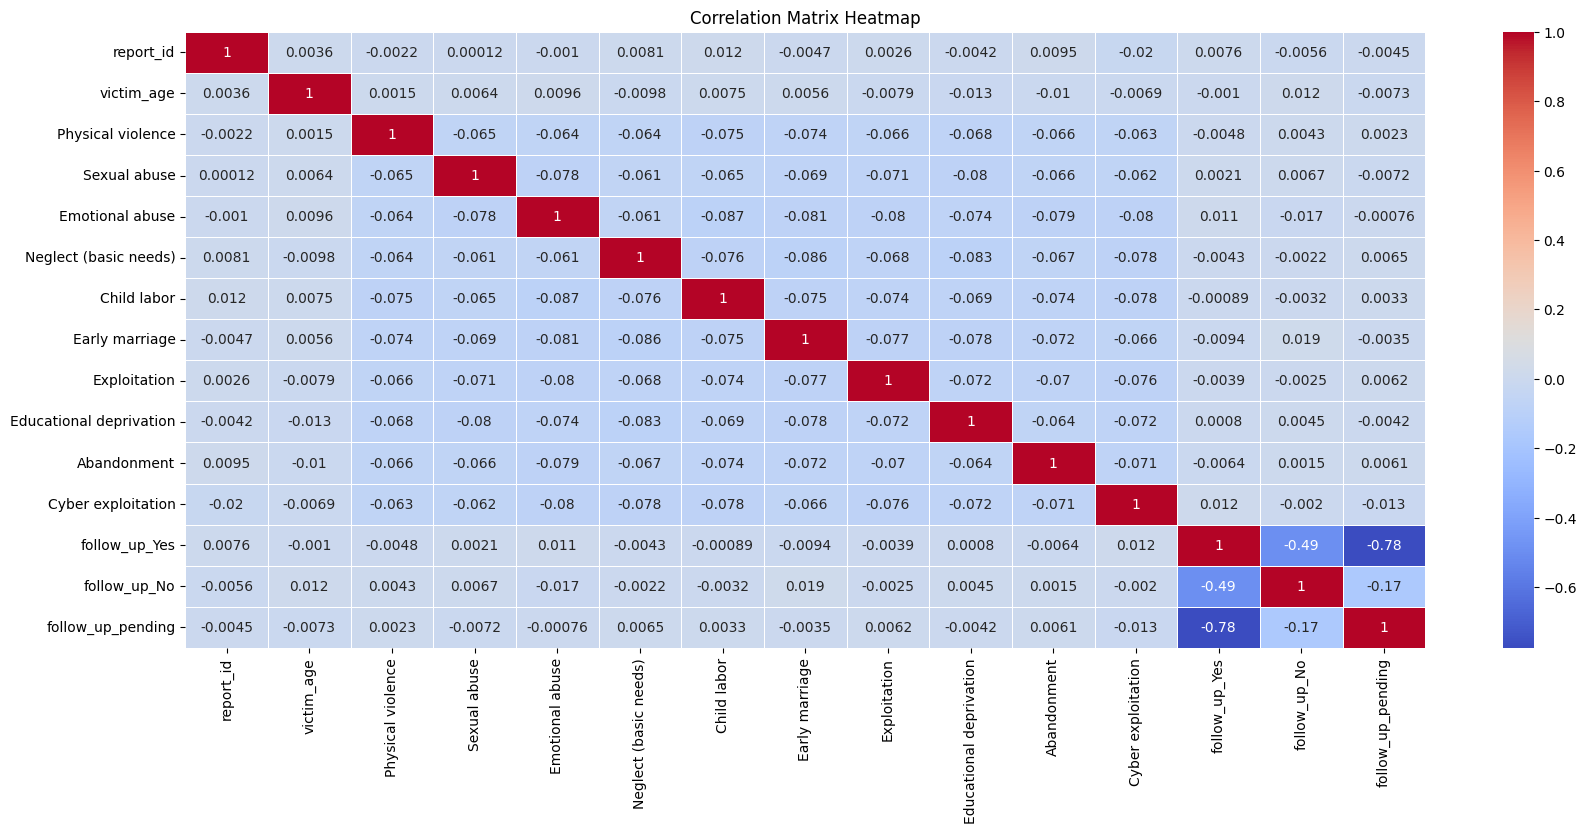

In [ ]:
numeric_ds = ds.select_dtypes(include=['number'])

correlation_matrix = numeric_ds.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
ds.dtypes

,0
report_id,int64
district,object
date_of_report,object
victim_age,float64
victim_gender,object
reporter_type,object
description,object
abuse_types,object
risk_level,object
follow_up_required,object


#Encode structured features

In [ ]:
# le_gender = LabelEncoder()
# ds['victim_gender_encoded'] = le_gender.fit_transform(ds['victim_gender'].fillna('Unknown'))
# print(dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))

# le_urban_rural = LabelEncoder()
# ds['urban_rural_encoded'] = le_urban_rural.fit_transform(ds['urban_rural'].fillna('Unknown'))
# print(dict(zip(le_urban_rural.classes_, le_urban_rural.transform(le_urban_rural.classes_))))

# le_district = LabelEncoder()
# ds['district_encoded'] = le_district.fit_transform(ds['district'].fillna('Unknown'))
# print(dict(zip(le_district.classes_, le_district.transform(le_district.classes_))))

# le_Month = LabelEncoder()
# ds['Month_encoded'] = le_Month.fit_transform(ds['district'].fillna('Unknown'))
# print(dict(zip(le_Month.classes_, le_Month.transform(le_Month.classes_))))

# # le_follow_up = LabelEncoder()
# # ds['follow_up_required_encoded'] = le_follow_up.fit_transform(ds['follow_up_required'].fillna('Unknown'))
# # print(dict(zip(le_follow_up.classes_, le_follow_up.transform(le_follow_up.classes_))))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

ds['description_clean'] = ds['description'].apply(clean_text)


tfidf = TfidfVectorizer(max_features=1000)
preprocessor = ColumnTransformer([
    ('text', tfidf, 'description_clean'),
    ...
])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000), 'description_clean'),
        ('num', StandardScaler(), ['victim_age']),
        ('cat_gender', OneHotEncoder(handle_unknown='ignore'), ['victim_gender']),
        ('cat_urban', OneHotEncoder(handle_unknown='ignore'), ['urban_rural']),
        ('cat_district', OneHotEncoder(handle_unknown='ignore'), ['district']),
        ('cat_month', OneHotEncoder(handle_unknown='ignore'), ['Month'])
    ])

In [ ]:
district_counts = ds['district'].value_counts().reset_index()
district_counts.columns = ['District', 'Total Cases']

abuse_types = ['Physical violence', 'Sexual abuse', 'Emotional abuse',
               'Neglect (basic needs)', 'Child labor', 'Early marriage',
               'Exploitation', 'Educational deprivation', 'Abandonment',
               'Cyber exploitation']

abuse_by_district = ds.groupby('district')[abuse_types].sum()

In [ ]:
from sklearn.cluster import KMeans

# Define abuse types
abuse_types = ['Physical violence', 'Sexual abuse', 'Emotional abuse',
               'Neglect (basic needs)', 'Child labor', 'Early marriage',
               'Exploitation', 'Educational deprivation', 'Abandonment',
               'Cyber exploitation']

abuse_by_district = ds.groupby('district')[abuse_types].sum()

risk_scores_ds = abuse_by_district.copy()

for abuse in abuse_types:
    quantiles = risk_scores_ds[abuse].quantile([0.33, 0.66])
    risk_scores_ds[f'{abuse}_risk_score'] = pd.cut(
        risk_scores_ds[abuse],
        bins=[-1, quantiles[0.33], quantiles[0.66], float('inf')],
        labels=[1, 2, 3]).astype(int)

risk_scores_ds['total_risk_score'] = risk_scores_ds[[f'{a}_risk_score' for a in abuse_types]].sum(axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(risk_scores_ds[['total_risk_score']])

cluster_order = risk_scores_ds.groupby(clusters)['total_risk_score'].mean().sort_values().index
risk_level_mapping = {cluster_order[0]: 'Low', cluster_order[1]: 'Medium', cluster_order[2]: 'High'}
risk_scores_ds['overall_risk'] = [risk_level_mapping[c] for c in clusters]

In [ ]:
score_to_label = {1: 'Low', 2: 'Medium', 3: 'High'}

for abuse in abuse_types:
    score_col = f'{abuse}_risk_score'
    label_col = f'{abuse}_risk'
    risk_scores_ds[label_col] = risk_scores_ds[score_col].map(score_to_label)


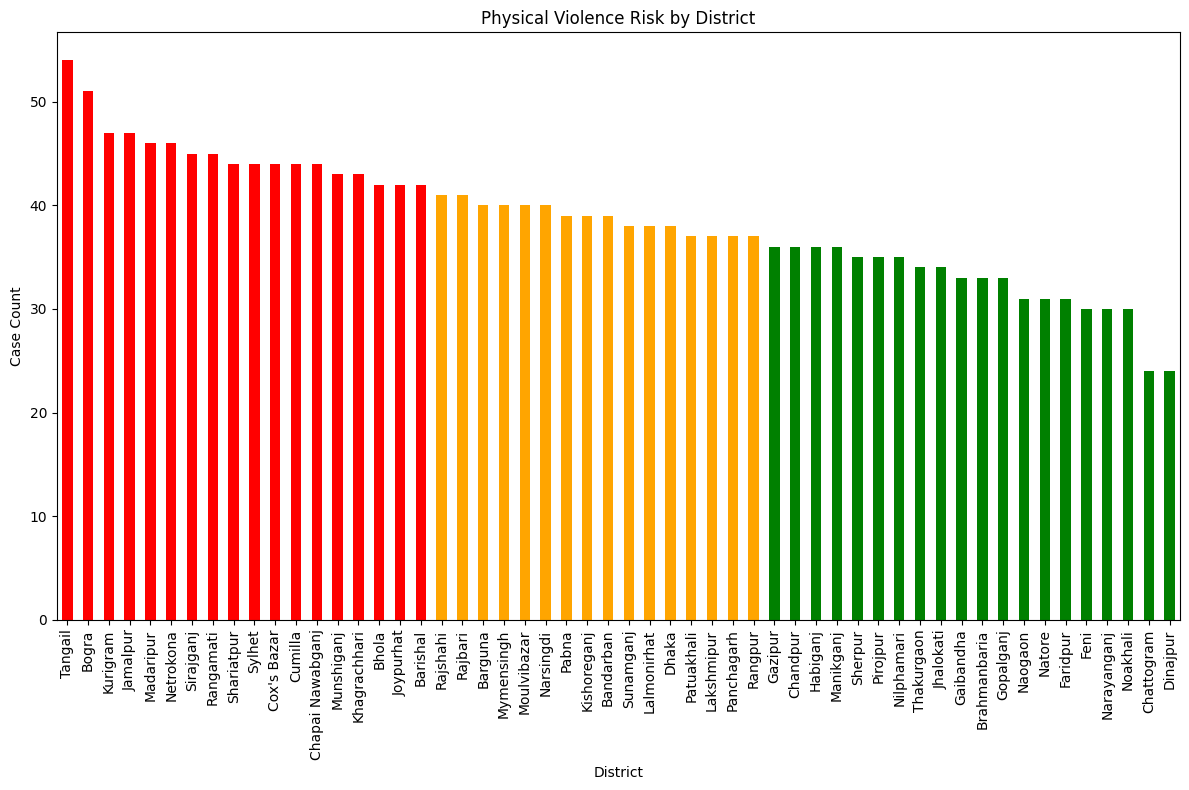

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
risk_scores_ds.sort_values('Physical violence', ascending=False)['Physical violence'].plot.bar(
    color=[{'High':'red', 'Medium':'orange', 'Low':'green'}[x]
           for x in risk_scores_ds.sort_values('Physical violence', ascending=False)['Physical violence_risk']]
)
plt.title('Physical Violence Risk by District')
plt.ylabel('Case Count')
plt.xlabel('District')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


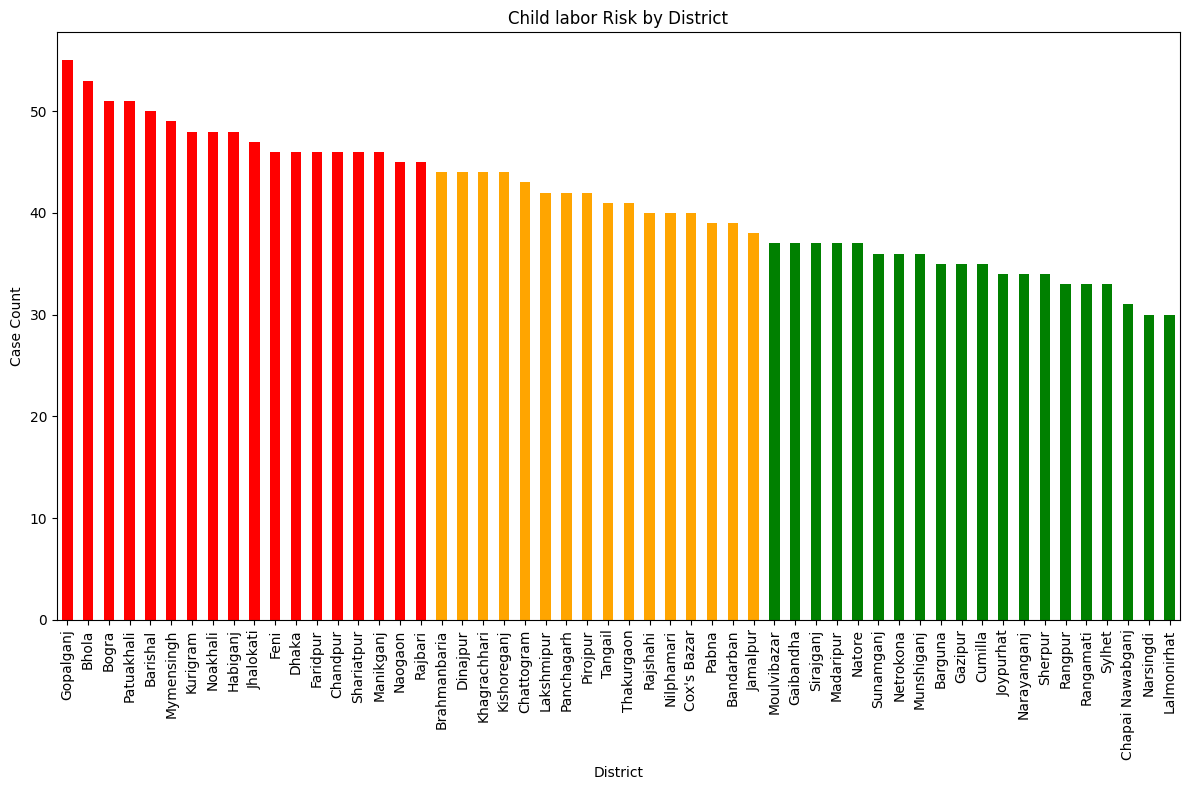

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
risk_scores_ds.sort_values('Child labor', ascending=False)['Child labor'].plot.bar(
    color=[{'High':'red', 'Medium':'orange', 'Low':'green'}[x]
           for x in risk_scores_ds.sort_values('Child labor', ascending=False)['Child labor_risk']]
)
plt.title('Child labor Risk by District')
plt.ylabel('Case Count')
plt.xlabel('District')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
y_risk = pd.DataFrame({
    'overall_risk': ds['district'].map(risk_scores_ds['overall_risk'])
})

In [ ]:
abuse_types = ['Physical violence', 'Sexual abuse', 'Emotional abuse', 'Neglect (basic needs)',
               'Child labor', 'Early marriage', 'Exploitation', 'Educational deprivation',
               'Abandonment', 'Cyber exploitation']
y_abuse = ds[abuse_types]

In [ ]:
# follow_up_required = ['follow_up_Yes', 'follow_up_No', 'follow_up_pending']
# y_follow_up = ds['follow_up_required']

# Split data into training & testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X = ds[['description_clean', 'victim_age', 'victim_gender', 'urban_rural', 'district', 'Month']]

X_train, X_test, y_abuse_train, y_abuse_test, y_risk_train, y_risk_test= train_test_split(
    X, y_abuse, y_risk, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (11596, 6), Testing set size: (2899, 6)


In [ ]:
np.unique(y_abuse_train, return_counts=True)
np.unique(y_risk_train, return_counts=True)

(array(['High', 'Low', 'Medium'], dtype=object), array([3630, 4775, 3191]))

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.linear_model import LogisticRegression

# # Multi-label abuse prediction pipeline
# abuse_pipeline_1 = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', MultiOutputClassifier(
#         LogisticRegression(class_weight='balanced', random_state=42)))
# ])
# abuse_pipeline_1.fit(X_train, y_abuse_train)

# # Risk prediction pipeline
# risk_pipeline_1 = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
# ])
# risk_pipeline_1.fit(X_train, y_risk_train.values.ravel())

#Random Forest Classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

abuse_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(
        RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)))
])
abuse_pipeline.fit(X_train, y_abuse_train)

risk_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])
risk_pipeline.fit(X_train, y_risk_train.values.ravel())

# # Follow-up pipeline
# follow_up_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
# ])
# follow_up_pipeline.fit(X_train, y_follow_up_train.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=1000),
                                                  'description_clean'),
                                                 ('num', StandardScaler(),
                                                  ['victim_age']),
                                                 ('cat_gender',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['victim_gender']),
                                                 ('cat_urban',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['urban_rural']),
                                                 ('cat_district',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['district']),
                                                 ('cat_month',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
from sklearn.metrics import classification_report

abuse_preds = abuse_pipeline.predict(X_test)
print("Abuse Type Classification Report:")
print(classification_report(y_abuse_test, abuse_preds, output_dict=False))

Abuse Type Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00       433
           3       1.00      1.00      1.00       405
           4       1.00      1.00      1.00       403
           5       1.00      1.00      1.00       447
           6       1.00      1.00      1.00       442
           7       1.00      1.00      1.00       441
           8       1.00      1.00      1.00       429
           9       1.00      1.00      1.00       454

   micro avg       1.00      1.00      1.00      4317
   macro avg       1.00      1.00      1.00      4317
weighted avg       1.00      1.00      1.00      4317
 samples avg       1.00      1.00      1.00      4317



In [ ]:
risk_preds = risk_pipeline.predict(X_test)
print("Risk Zone Classification Report:")
print(classification_report(y_risk_test, risk_preds, output_dict=False))

Risk Zone Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       928
         Low       1.00      1.00      1.00      1167
      Medium       1.00      1.00      1.00       804

    accuracy                           1.00      2899
   macro avg       1.00      1.00      1.00      2899
weighted avg       1.00      1.00      1.00      2899



In [ ]:
# follow_up_preds = follow_up_pipeline.predict(X_test)
# print("Follow-up Required Classification Report:")
# print(classification_report(y_follow_up_test, follow_up_preds))

#Test

In [ ]:
abuse_type_names = [
    'Physical violence', 'Sexual abuse', 'Emotional abuse',
    'Neglect (basic needs)', 'Child labor', 'Early marriage',
    'Exploitation', 'Educational deprivation', 'Abandonment',
    'Cyber exploitation'
]

new_case = pd.DataFrame({
    'description_clean': ["Child observed bruises, involved in grooming, reported inappropriate touching"],
    'victim_age': [10],
    'victim_gender': ["Male"],
    'urban_rural': ["Urban"],
    'district': ["Kurigram"],
    'Month': ['2022/09/10']
})

# Predict
abuse_pred = abuse_pipeline.predict(new_case)
risk_pred = risk_pipeline.predict(new_case)
# follow_up_pred = follow_up_pipeline.predict(new_case)

predicted_abuse_types = [
    abuse_type_names[i] for i, flag in enumerate(abuse_pred[0]) if flag == 1
]

print("Predicted Abuse Types:", predicted_abuse_types)
print("Predicted Risk Zone:", risk_pred[0])
# print("Follow-up Required:", follow_up_preds)

Predicted Abuse Types: ['Physical violence', 'Sexual abuse', 'Cyber exploitation']
Predicted Risk Zone: Medium


In [ ]:
abuse_type_names = [
    'Physical violence', 'Sexual abuse', 'Emotional abuse',
    'Neglect (basic needs)', 'Child labor', 'Early marriage',
    'Exploitation', 'Educational deprivation', 'Abandonment',
    'Cyber exploitation'
]

new_case = pd.DataFrame({
    'description_clean': ["Child not attending school since 2 years, subjected to physical exploitation"],
    'victim_age': [10],
    'victim_gender': ["Male"],
    'urban_rural': ["Urban"],
    'district': ["Dhaka"],
    'Month': ['3/9/2022']
})

# Predict
abuse_pred = abuse_pipeline.predict(new_case)
risk_pred = risk_pipeline.predict(new_case)
# follow_up_pred = follow_up_pipeline.predict(new_case)

predicted_abuse_types = [
    abuse_type_names[i] for i, flag in enumerate(abuse_pred[0]) if flag == 1
]

print("Predicted Abuse Types:", predicted_abuse_types)
print("Predicted Risk Zone:", risk_pred[0])
# print("Follow-up Required:", follow_up_preds)

Predicted Abuse Types: ['Exploitation', 'Educational deprivation']
Predicted Risk Zone: High


In [ ]:
abuse_type_names = [
    'Physical violence', 'Sexual abuse', 'Emotional abuse',
    'Neglect (basic needs)', 'Child labor', 'Early marriage',
    'Exploitation', 'Educational deprivation', 'Abandonment',
    'Cyber exploitation'
]

new_case = pd.DataFrame({
    'description_clean': ["Child observed burns"],
    'victim_age': [16],
    'victim_gender': ["Female"],
    'urban_rural': ["Rural"],
    'district': ["Patuakhali"],
    'Month': ['1/23/2023']
})

# Predict
abuse_pred = abuse_pipeline.predict(new_case)
risk_pred = risk_pipeline.predict(new_case)
# follow_up_pred = follow_up_pipeline.predict(new_case)

predicted_abuse_types = [
    abuse_type_names[i] for i, flag in enumerate(abuse_pred[0]) if flag == 1
]

print("Predicted Abuse Types:", predicted_abuse_types)
print("Predicted Risk Zone:", risk_pred[0])
# print("Follow-up Required:", follow_up_preds)

Predicted Abuse Types: ['Physical violence']
Predicted Risk Zone: High
